In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
#from keras.layers import merge, Input
from keras.models import Model
from keras.utils import to_categorical
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
# from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from keras.applications.densenet import DenseNet201
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop

from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Capstone/training')

In [ ]:
#Pala
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Pala')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Cengkeh
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Cengkeh')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kunyit
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kunyit')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Ketumbar
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Ketumbar')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Lengkuas
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Lengkuas')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Jahe
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Jahe')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Bunga Lawang
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Bunga Lawang')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kemiri
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kemiri')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kencur
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kencur')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kayu Manis
import os
folder_path = ('/content/drive/MyDrive/Capstone/training/Kayu Manis')
test = os.listdir(folder_path)
for fichier in test:
    if not(fichier.endswith(".jpg")):
        os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/Capstone/training')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.jpg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(10)

,Filepath,Label
0,/content/drive/MyDrive/Capstone/training/Bunga...,Bunga Lawang
1,/content/drive/MyDrive/Capstone/training/Kayu ...,Kayu Manis
2,/content/drive/MyDrive/Capstone/training/Kencu...,Kencur
3,/content/drive/MyDrive/Capstone/training/Kencu...,Kencur
4,/content/drive/MyDrive/Capstone/training/Kemir...,Kemiri
5,/content/drive/MyDrive/Capstone/training/Pala/...,Pala
6,/content/drive/MyDrive/Capstone/training/Lengk...,Lengkuas
7,/content/drive/MyDrive/Capstone/training/Ketum...,Ketumbar
8,/content/drive/MyDrive/Capstone/training/Lengk...,Lengkuas
9,/content/drive/MyDrive/Capstone/training/Kunyi...,Kunyit


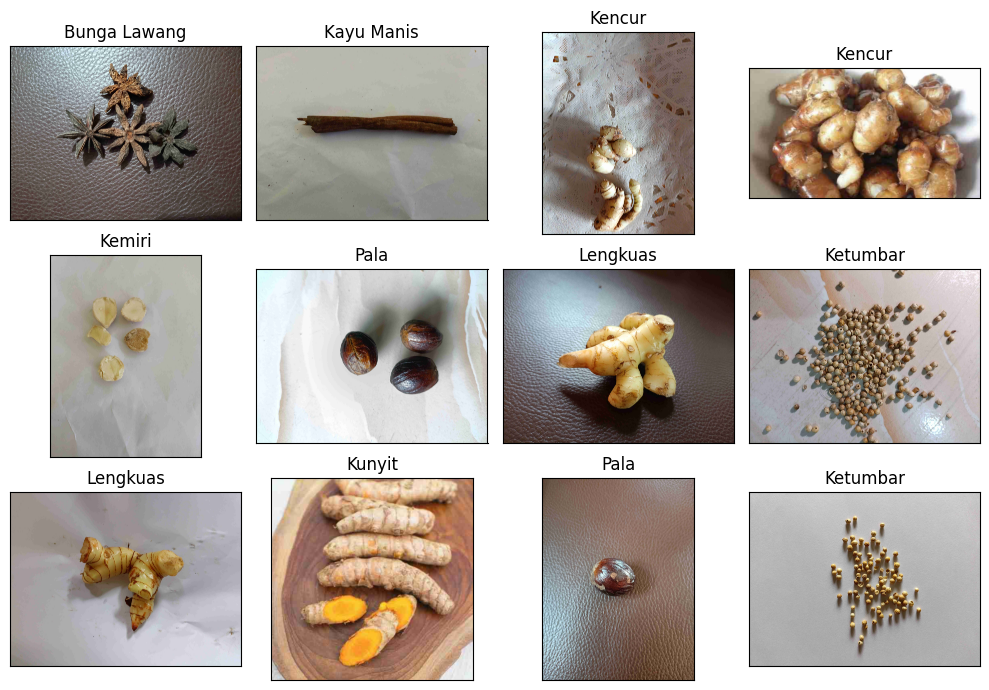

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[i]))
    ax.set_title(image_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-19-cfe65e27ff25>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


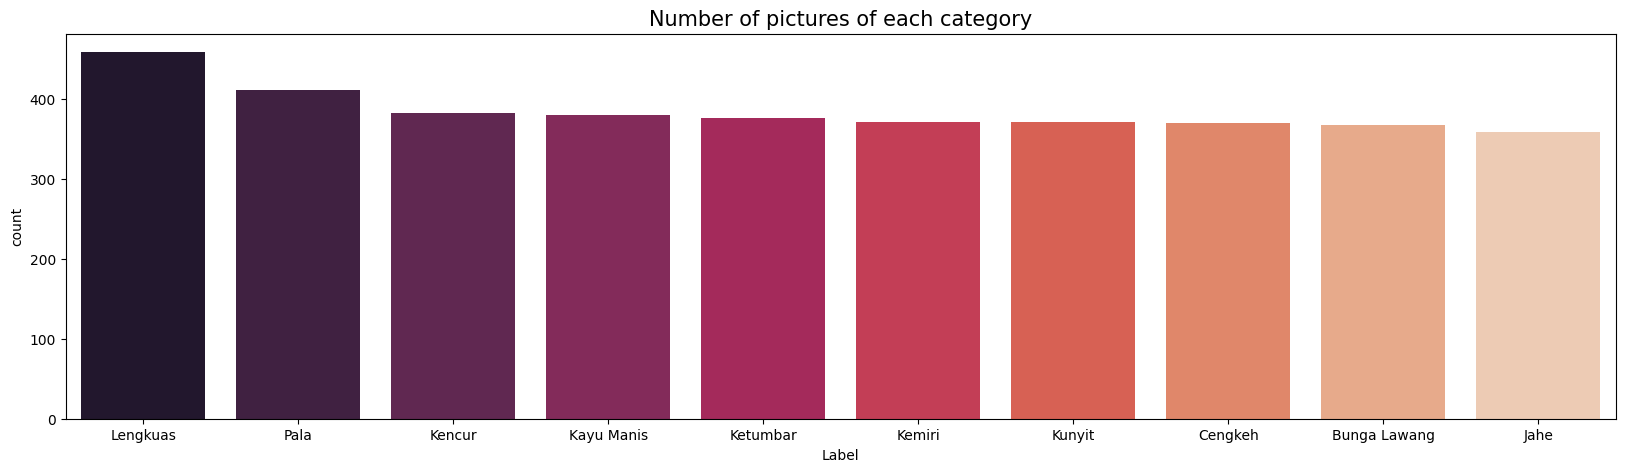

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = image_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()


In [ ]:
#Shuffle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, validasi_df = train_test_split(image_df, train_size=0.8, shuffle=True, random_state=1)

In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                        subset='training',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         seed=0,
                                         target_size=(416,416),
                                         batch_size=16,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 3080 validated image filenames belonging to 10 classes.
Found 770 validated image filenames belonging to 10 classes.


In [ ]:
from keras import Model, Input
input_shape = (416,416,3)
model_input = Input(shape=input_shape)

In [ ]:
denseNet = DenseNet201(input_shape=input_shape, input_tensor=model_input, include_top=False, weights="imagenet")

74836368/74836368 [==============================] - 1s 0us/step


In [ ]:
for layer in denseNet.layers:
    layer.trainable = False

In [ ]:
denseNet_last_layer = denseNet.get_layer('relu')
print('last layer output shape:', denseNet_last_layer.output_shape)
denseNet_last_output = denseNet_last_layer.output

last layer output shape: (None, 13, 13, 1920)


In [ ]:
# Flatten the output layer to 1 dimension
x_denseNet = layers.GlobalMaxPooling2D()(denseNet_last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x_denseNet = layers.Dense(512, activation='relu')(x_denseNet)
# Add a dropout rate of 0.7
x_denseNet = layers.Dropout(0.15)(x_denseNet)
# Add a final sigmoid layer for classification
x_denseNet = layers.Dense(10, activation='softmax')(x_denseNet)

# Configure and compile the model

denseNet_model = Model(model_input, x_denseNet)
optimizer = RMSprop(learning_rate=0.0001)
denseNet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# denseNet_model.load_weights("DenseNetFull.h5")
# denseNet_model.DenseNet201(pretrained=True)
denseNet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 416, 416, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 422, 422, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 208, 208, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 208, 208, 64)         256       ['conv1/conv[0][0]']      

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.1 and logs.get('val_loss') < 0.1):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/coba/Desnet201/Desnet201-512-015.h5'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
# desnet
callbacks= myCallback()
history_denseNet = denseNet_model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/16,
                  validation_steps=validasi_data.n/16,
                  epochs=20,
                  callbacks=([callbacks],[checkpoint_callback]))

Epoch 1/20
193/192 [==============================] - ETA: -8s - loss: 0.7276 - accuracy: 0.7825
Epoch 1: val_loss improved from inf to 0.11506, saving model to /content/drive/MyDrive/coba/Desnet201/Desnet201-512-015.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


192/192 [==============================] - 4013s 21s/step - loss: 0.7276 - accuracy: 0.7825 - val_loss: 0.1151 - val_accuracy: 0.9584
Epoch 2/20
193/192 [==============================] - ETA: -8s - loss: 0.1484 - accuracy: 0.9562
Epoch 2: val_loss improved from 0.11506 to 0.06981, saving model to /content/drive/MyDrive/coba/Desnet201/Desnet201-512-015.h5
192/192 [==============================] - 3919s 20s/step - loss: 0.1484 - accuracy: 0.9562 - val_loss: 0.0698 - val_accuracy: 0.9766
Epoch 3/20
193/192 [==============================] - ETA: -8s - loss: 0.1061 - accuracy: 0.9685
Epoch 3: val_loss improved from 0.06981 to 0.05351, saving model to /content/drive/MyDrive/coba/Desnet201/Desnet201-512-015.h5
192/192 [==============================] - 3947s 20s/step - loss: 0.1061 - accuracy: 0.9685 - val_loss: 0.0535 - val_accuracy: 0.9818
Epoch 4/20
193/192 [==============================] - ETA: -8s - loss: 0.0695 - accuracy: 0.9786\Stopped, Akurasi mencapai 98%

Epoch 4: val_loss impr

In [ ]:
#plotting
import matplotlib.pyplot as plt
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-32-d14c9c73262d>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


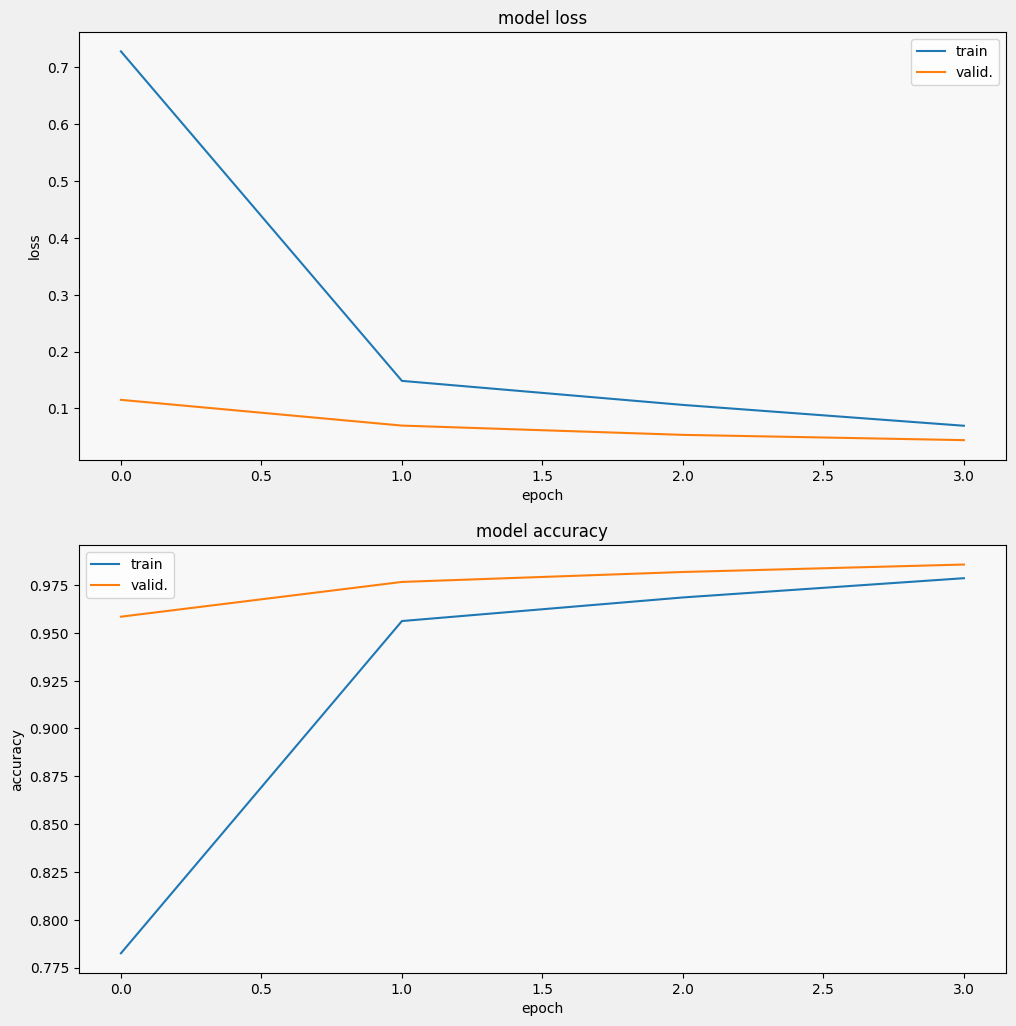

In [ ]:
#display
display_training_curves(
    history_denseNet.history['loss'],
    history_denseNet.history['val_loss'],
    'loss', 211)
display_training_curves(
    history_denseNet.history['accuracy'],
    history_denseNet.history['val_accuracy'],
    'accuracy', 212)

In [ ]:
# Predict the label of the test_images
import numpy as np
pred = denseNet_model.predict(validasi_data)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 10 predictions: {pred[:10]}')

49/49 [==============================] - 779s 16s/step
The first 10 predictions: ['Pala', 'Jahe', 'Lengkuas', 'Ketumbar', 'Kencur', 'Kemiri', 'Pala', 'Lengkuas', 'Kencur', 'Ketumbar']


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(validasi_df.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

Bunga Lawang       1.00      1.00      1.00        79
     Cengkeh       1.00      1.00      1.00        76
        Jahe       1.00      0.97      0.99        73
  Kayu Manis       1.00      0.99      0.99        74
      Kemiri       1.00      0.99      0.99        79
      Kencur       1.00      0.95      0.97        79
    Ketumbar       1.00      0.97      0.99        80
      Kunyit       0.95      1.00      0.97        69
    Lengkuas       0.96      0.99      0.98        80
        Pala       0.95      1.00      0.98        81

    accuracy                           0.99       770
   macro avg       0.99      0.99      0.99       770
weighted avg       0.99      0.99      0.99       770



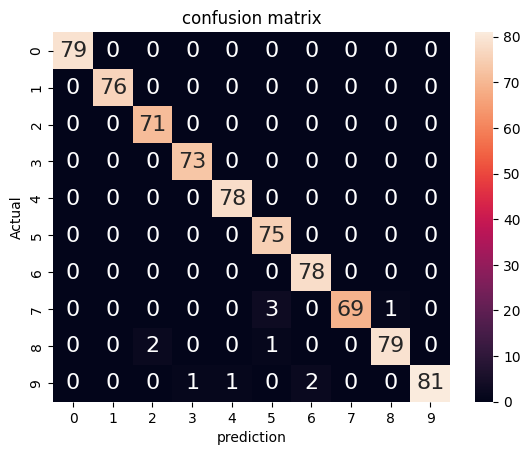

In [ ]:
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred,y_test)
df_cm = pd.DataFrame(cm, index = [i for i in range(10)],
                  columns = [i for i in range(10)])
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

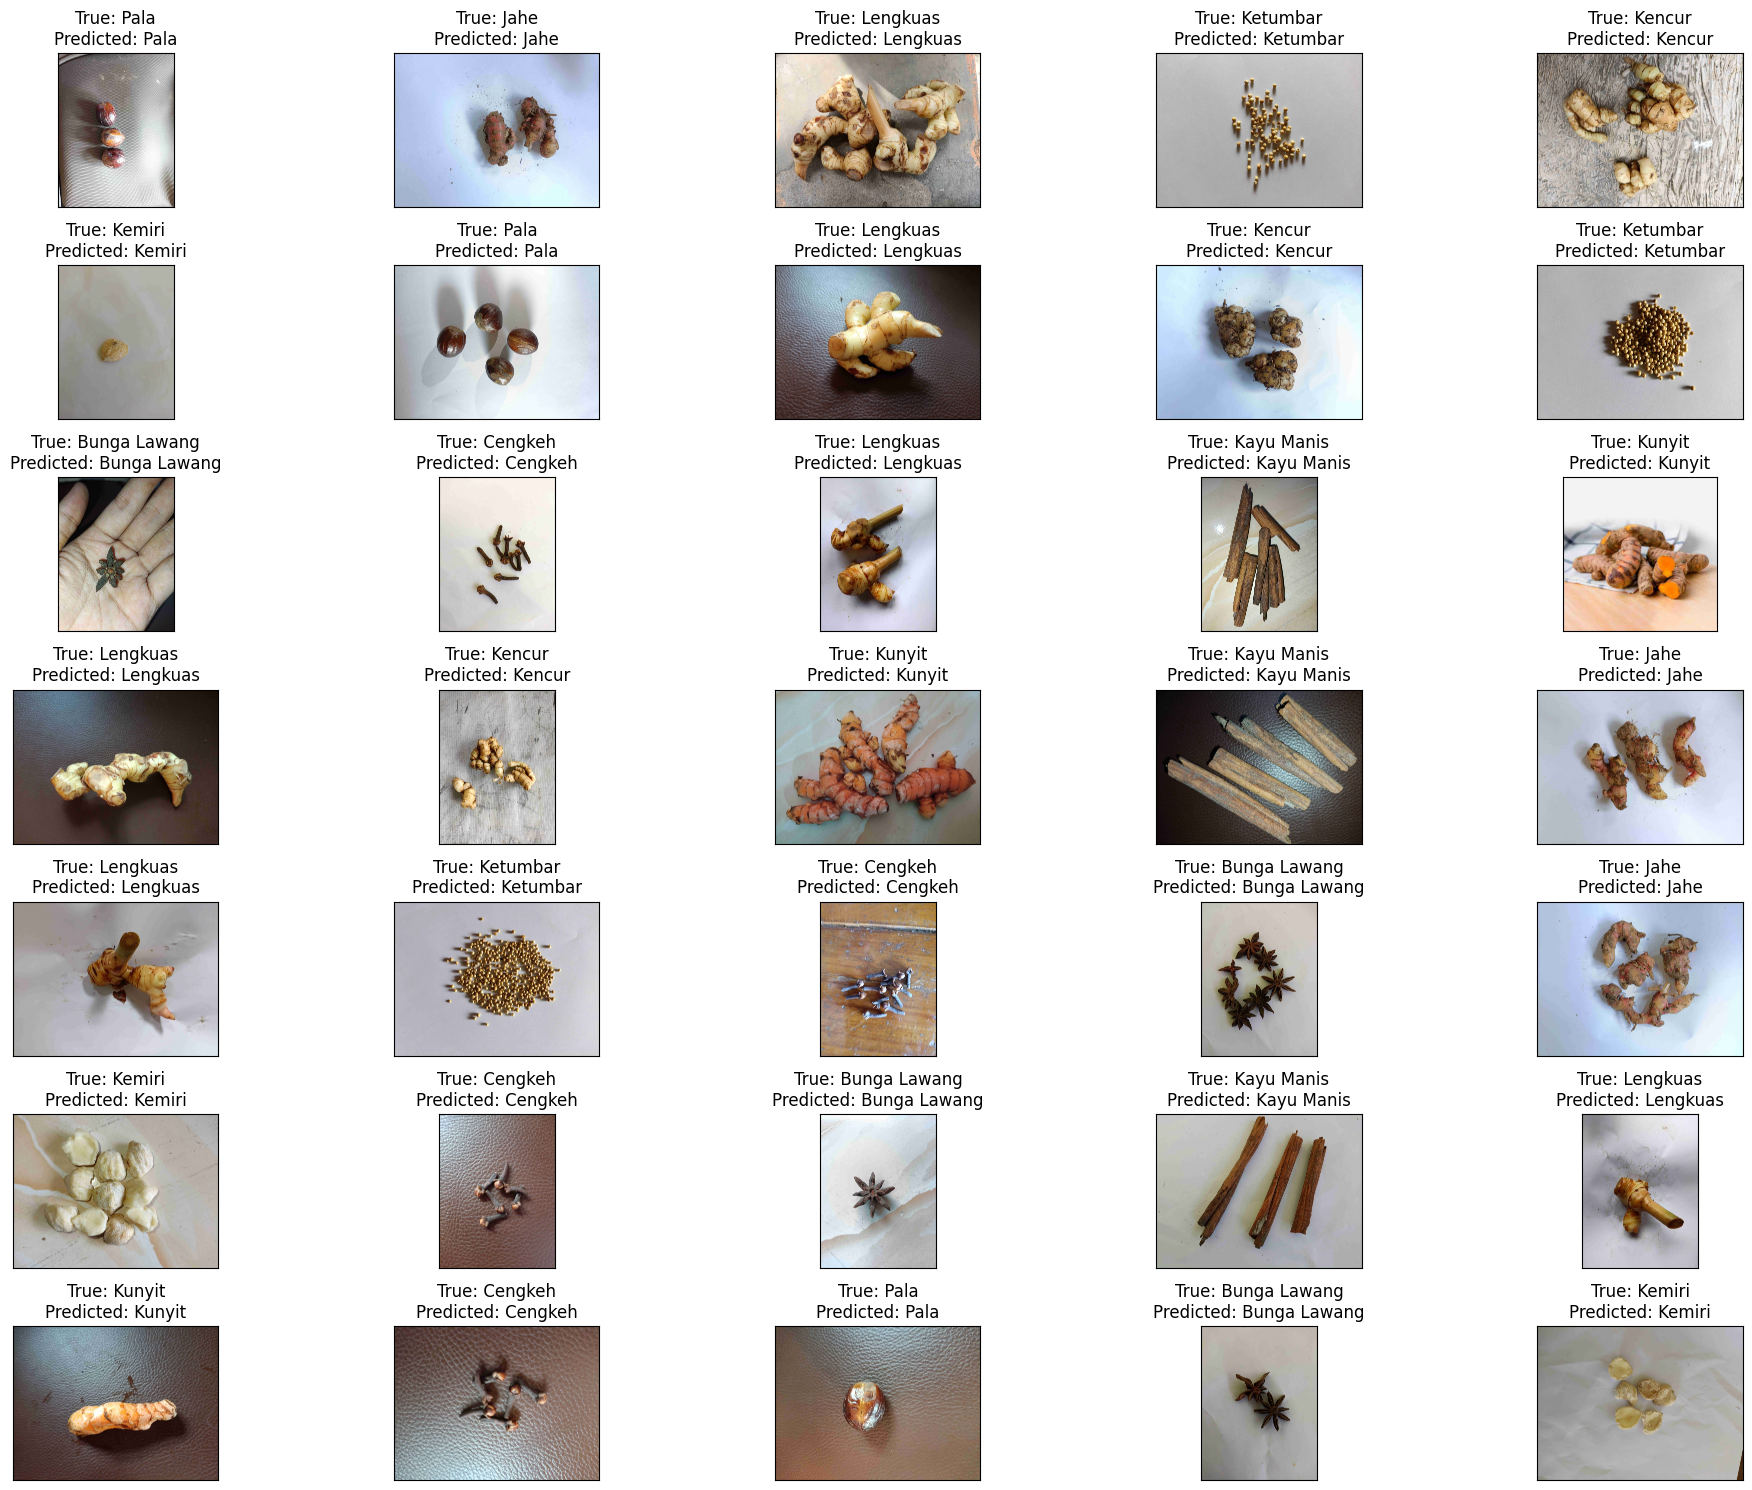

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath.iloc[i]))
    ax.set_title(f"True: {validasi_df.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()


In [ ]:
# import tensorflow as tf
# class myCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('loss') < 0.07 and logs.get('val_loss') < 0.1):
#       print("\Stopped, Akurasi mencapai 98%")
#       self.model.stop_training = True;

In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# # Tentukan path penyimpanan model
# checkpoint_path = '/content/drive/MyDrive/Percobaan-Desnet201-1/Desnet201-512-015.h5'

# # Buat callback ModelCheckpoint
# checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
#                                       monitor='loss',  # Metrik yang akan dipantau
#                                       save_best_only=True,  # Hanya menyimpan model terbaik
#                                       save_weights_only=False,  # Menyimpan seluruh model
#                                       mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
#                                       verbose=1)  # Menampilkan pesan saat menyimpan

In [ ]:
from tensorflow.keras.models import load_model
denseNet_model = load_model(checkpoint_path)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(learning_rate=0.0001)
denseNet_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
MODEL_BASE_PATH = "/content/drive/MyDrive/coba"
PROJECT_NAME = "Desnet201"
SAVE_MODEL_NAME = "Final(1-6-24 : 09 AM)-Desnet201-512-015.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))

Saving Model At /content/drive/MyDrive/coba/Desnet201/Final(1-6-24 : 09 AM)-Desnet201-512-015.h5...


In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import os
from google.colab import files

# Load trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/coba/Desnet201/Desnet201-512-015.h5")

# Path to directory containing class labels
train_dir = "/content/drive/MyDrive/Capstone/training"
class_list = sorted(os.listdir(train_dir))

# Function to process image and make prediction
def predict_image(img):
    # Preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(x)

    # Get predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_list[predicted_class_index]

    return predicted_class, predictions[0]

# Upload image
uploaded = files.upload()

# Process and predict class label for each uploaded image
for fn in uploaded.keys():
    # Load and preprocess uploaded image
    img = image.load_img(fn, target_size=(416, 416))

    # Predict class label
    predicted_class, confidence_scores = predict_image(img)

    # Display prediction result
    print("Image:", fn)
    print("Predicted Class:", predicted_class)
    print("Confidence Scores:", confidence_scores)
    print()



Saving WhatsApp Image 2024-06-01 at 13.53.21.jpeg to WhatsApp Image 2024-06-01 at 13.53.21.jpeg
1/1 [==============================] - 7s 7s/step
Image: WhatsApp Image 2024-06-01 at 13.53.21.jpeg
Predicted Class: Ketumbar
Confidence Scores: [4.9589074e-04 2.3825528e-02 1.1959381e-05 8.0958271e-04 6.7210535e-04
 1.6755406e-03 9.4791049e-01 1.1835921e-03 1.4555891e-03 2.1959769e-02]



In [ ]:
import os
from tensorflow.keras.models import load_model
import numpy as np

# Muat model dari file .h5
model = load_model("/content/drive/MyDrive/coba/Desnet201/Desnet201-512-015.h5")

# Dapatkan arsitektur model dalam format JSON
model_json = model.to_json()

# Tentukan direktori output di Google Drive
output_dir = '/content/drive/MyDrive/coba/Desnet201/'
json_path = os.path.join(output_dir, 'model.json')
bin_path = os.path.join(output_dir, 'model_weights.bin')

# Pastikan direktori output ada
os.makedirs(output_dir, exist_ok=True)

# Simpan arsitektur model ke file JSON
with open(json_path, 'w') as json_file:
    json_file.write(model_json)

# Dapatkan bobot model
model_weights = model.get_weights()

# Gabungkan semua bobot menjadi satu array
weights_flat = np.concatenate([w.flatten() for w in model_weights])

# Simpan array bobot ke file BIN
weights_flat.tofile(bin_path)

print(f"Model dan bobot telah berhasil dikonversi dan disimpan ke dalam file JSON ({json_path}) dan BIN ({bin_path}).")


Model dan bobot telah berhasil dikonversi dan disimpan ke dalam file JSON (/content/drive/MyDrive/coba/Desnet201/model.json) dan BIN (/content/drive/MyDrive/coba/Desnet201/model_weights.bin).
